# **AP155 Lab Assignment** 
## Module 4: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 3 are worth 20, 30, and 50 points, respectively).

_Due Date_: **5PM of November 23 (Tue)**


### Student Information 

_Full Name (Last Name, First Name)_: Soriano, Edneil E. Jr. \
_Student No._: 2020-02420  
_Section_: HX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** 

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **98**/100

Score breakdown:
* Problem 1 - 20/20
* Problem 2 - 28/30
* Problem 3 - 50/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (20 pts.; 50/50 for code & discussion) 
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(10 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(10 pts.)*


In [1]:
import numpy as np
import matplotlib.pyplot as plt


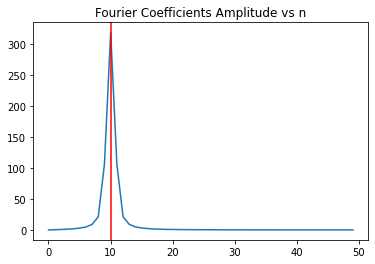

In [2]:
N = 1000
# ==============================
n = np.arange(0.01, N)


def y_n(N, n):     # input is a float N and array n ranging from 0 to N, output is another array giving y_n values
    return np.sin((np.pi*n)/N)*np.sin((20*np.pi*n)/N)


def dft(y):       # input is array consisting of sample points y, output is fourier coefficients (wow very official)
    c = np.zeros(N//2 + 1, complex)    # initialize array for amplitudes ;  if N is odd, we have (N+1)/2 elements
                                       # if N is even, we have N/2 + 1 because of the floor division amazing wow
    for k in range(len(c)):
        for n in range(N):
            c[k] += y[n] * np.exp((-2j * np.pi * k * n)/N)   # this is the formula for finding coefficents
    return c

y_n = y_n(N, n)
c_k = dft(y_n)      
c_k_mag = np.abs(c_k)           # get the absolute value since we can't plot using complex nums
n_lim = 50                      # used later as limit of x_axis

fig, ax = plt.subplots()
plot = ax.plot(np.arange(0.01, n_lim), c_k_mag[0: len(np.arange(0, n_lim))])
ax.set(title = 'Fourier Coefficients Amplitude vs n')
plt.axvline(np.argmax(c_k_mag), color = "red") # we plot a vertical line at the index of the peak,
                                               # we can see that the signal is smooth and there is only one peak
plt.show()

##### Comments - Leo

- **Score: 20/20**

### PROBLEM 2 (30 pts.; 50/50 for code & discussion)

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the General > Datasets folder) and directly from this link: https://drive.google.com/file/d/1CHXGF2s9HvKJPTVRWeq5tJpgFxYuOgOg/view?usp=sharing

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(5 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(10 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(5 pts.)* 

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(10 pts.)*

Mount the Google Drive where you saved the file $\tt dow.txt$. 

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [3]:
# from google.colab import drive
# drive.mount("/content/drive")

Run this command to list the directories in your Google Drive and check that the mount was successful.

In [4]:
# !ls drive/My\ Drive

Define the directory path to the location of the file $\tt dow.txt$, i.e. if it is in a folder named "AP155" under My Drive, then the file path will be "/content/drive/My Drive/AP155". Change the string variable in the code cell below, as needed:

In [5]:
# file_path = "/content/drive/My Drive/AP155/"

Use numpy's $\tt loadtxt$ function ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)) to load the $\tt dow.txt$ file and save the data into a numpy array named $\tt dow$.

In [6]:
import numpy as np
dow = np.loadtxt("dow.txt")

Print out the first 10 elements of the array $\tt dow$. Check that you get the ff. output:
```
array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85, 12331.6 , 12309.25, 12278.41, 12307.48])
``` 

In [7]:
dow[0:10]

array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85,
       12331.6 , 12309.25, 12278.41, 12307.48])

Now you can start to write code for this problem!

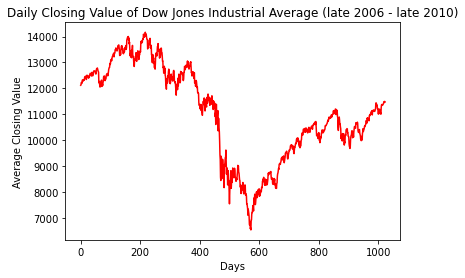

In [8]:
"""
First, let's plot dow because why not and because it's required for 5 points
"""


days = np.arange(len(dow))     # create array of each day from 0 to len(dow) which is 1024

fig, ax = plt.subplots()

plot = ax.plot(days, dow, ls='-',  color='r')

ax.set(title = 'Daily Closing Value of Dow Jones Industrial Average (late 2006 - late 2010)',
      ylabel = 'Average Closing Value',
      xlabel = 'Days')

plt.show()

In [9]:
"""
Now, we calculate the Fourier coefficients using numpy's Fast Fourier Transform
"""


from numpy.fft import rfft

c = rfft(dow)
print("length = " + str (len(c)))

length_c = len(c)
accepted_c = len(c)//10 # this is the index of the upper 10% which is up to 51

c[accepted_c:] = 0      # everything after the accepted index, equal it to 0

# we will get a length of 513, which is correct since the length of dow is 1024

length = 513


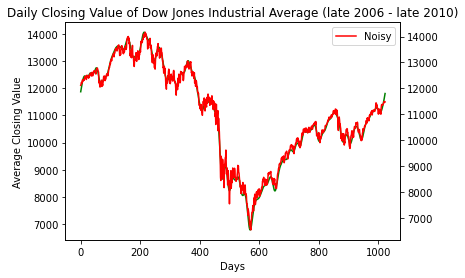

In [10]:
"""
Now, we calculate the inverse Fourier transform since we already eliminated higher order terms that make up noise
"""
from numpy.fft import irfft

dow_clean = irfft(c)

# Then, we plot


days = np.arange(len(dow_clean))     # create array of each day from 0 to len(dow) which is 1024


fig, ax = plt.subplots()
plot_1 = ax.plot(days, dow_clean, color='g', label = 'Clean')
ax2 = ax.twinx()
plot_2 = ax2.plot(days, dow, color='r', label = 'Noisy')
ax.set(title = 'Daily Closing Value of Dow Jones Industrial Average (late 2006 - late 2010)',
      ylabel = 'Average Closing Value',
      xlabel = 'Days')

plt.legend()
plt.show()



##### Comments - Leo

- The clean data is not labelled and not visible because of the colors used (or might have been hidden under the noisy plot)
- **Score: 28/30**

### PROBLEM 3 (50 pts.; 50/50 for code & discussion)

**Real-world Application: Image deconvolution**

_Refer to Exercise 7.9 of the Newman text_ For this problem, you will use data from a text file called $\tt blur.txt$. It contains a grid of values representing brightness on a black-and-white photo-- a badly out-of-focus one that has been deliberately blurred using a Gaussian point spread function of width $\sigma = 25$. 

Similar to what you did for Problem 2, you need to make a copy of the file $\tt blur.txt$ and save it to the same folder in your **own Google Drive** where you saved $\tt dow.txt$. This file is available from the AP155 Course Pack Google Drive (in the General > Datasets folder) and directly from this link: https://drive.google.com/file/d/1CHXGF2s9HvKJPTVRWeq5tJpgFxYuOgOg/view?usp=sharing

1. Use numpy's $\tt loadtxt$ to load the grid of values into a two-dimensional array of real numbers, e.g.:
```
blur = np.loadtxt(file_path+"blur.txt")
``` 
Plot the values on the screen of the computer as a density plot. (Hint: Use $\tt imshow$ and $\tt show$ from the pylab package.) You should see the photo appear. If you get something wrong it might be upside-down. Work with the details of your program until you get it appearing correctly. (Hint: The picture has the sky, which is bright, at the top and the ground, which is dark, at the bottom.) *(10 pts.)*

2. Create an array of the point spread function (PSF), of the same size as the photo, based on the Gaussian function $f(x,y) = exp\left(-\frac{x^2+y^2}{2\sigma^2}\right)$. In particular, get the sum of 4 Gaussians with $\sigma = 25$ centered on each of the four corners of the image. _Refer to the figure on page 325 of the Newman text._ *(10 pts.)*

3. Make a density plot of these values on the screen, so that you get a visualization of your point spread function. *(10 pts.)*

3. Apply Fourier transforms using the functions $\tt rfft2$ and $\tt irfft2$ from numpy's $\tt fft$ package to perform image deconvolution as follows:

* Get Fourier transforms of both the blurred image and the PSF from (1) and (2) 
* Divide one by the other
* Perform an inverse transform to get the unblurred photo
* Display the unblurred photo on the screen

When you are done, you should be able to make out the scene in the photo, although probably it will still not be perfectly sharp. *(20 pts.)*

   Hint: One thing you'll need to deal with is what happens when the Fourier transform of the point spread function is zero, or close to zero. In that case if you divide by it you'll get an error (because you can't divide by zero) or just a very
large number (because you're dividing by something small). A workable compromise is that if a value in the Fourier transform of the point spread function is smaller than a certain amount $\epsilon$ you don't divide by it-- just leave that coefficient alone. The value of $\epsilon$ is not very critical but a reasonable value seems to be $10^{-3}$. 

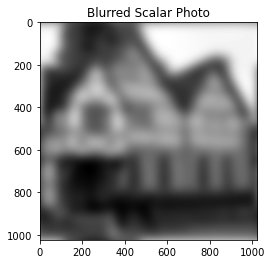

In [14]:
import matplotlib.image as mpimg
import math 

blur = np.loadtxt("blur.txt")     # we load the 2d SCALAR array
shape = np.shape(blur)            # store its dimensions to a tuple
plt.title('Blurred Scalar Photo')
plt.imshow(blur, cmap='gray')     # plot using a grayscale image (if RGB kailangan 3 values each index so gray lang dito)

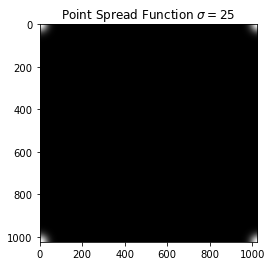

In [17]:
sigma = 25

# The problem tells us to apply the Gaussian 4 times, treating each corner as an origin. 
origin_UL = (0, 0)              # upper left corner index
origin_UR = (0, 1024)           # upper right corner
origin_LL = (1024, 0)           # lower left corner
origin_LR = (1024, 1024)        # lower right corner
 

"""
First, we create an empty psf_arr. We then use the Gaussian f(x,y) to assign values on the 
whole 2d grid. We use the 4 corners as the origins, apply the formula for each, then find the sum at each
point in the 2d array.

We define the function below to calculate the 2d gaussian for each point given a center

args: 
x and y - index of point where we will calculate the 2d gaussian 
x_c and y_c - the center we will use to calculate the 2d gaussian (we will use the corners)
sigma - sigma grindset nuclear war any%

This will a center(x,y), then calculate the 2d gaussian at the point(x,y)

"""


def gaussian_2d(x, y, xc, yc, sigma):
    num = -((x-xc)**2 + (y-yc)**2)
    denom = 2 * (sigma**2)
    return np.exp(num/denom)          

"""
I wasted 2 hours trying to fix an overflow so don't modify the gaussian_2d into a oneliner future me. 
The extra assignments enable numpy to limit the bits used for num and denom. 
"""

psf_array = np.zeros((1024, 1024))            # initialize 2d array of the PSF image

for i in range(1024):              # iterate over all rows i
    for k in range(1024):          # iterate over all columns k
        psf_array[i,k] =  gaussian_2d(i, k, origin_UL[0], origin_UL[1], sigma) # calculate the 2d gaussian using UL origin
        psf_array[i,k] += gaussian_2d(i, k, origin_UR[0], origin_UR[1], sigma) # calculate the 2d gaussian using UR origin
        psf_array[i,k] += gaussian_2d(i, k, origin_LL[0], origin_LL[1], sigma) # calculate the 2d gaussian using LL origin
        psf_array[i,k] += gaussian_2d(i, k, origin_LR[0], origin_LR[1], sigma) # calculate the 2d gaussian using LR origin

plt.title('Point Spread Function $\sigma = 25$') 
plt.imshow(psf_array, cmap='gray')

(-0.5, 1023.5, 1023.5, -0.5)

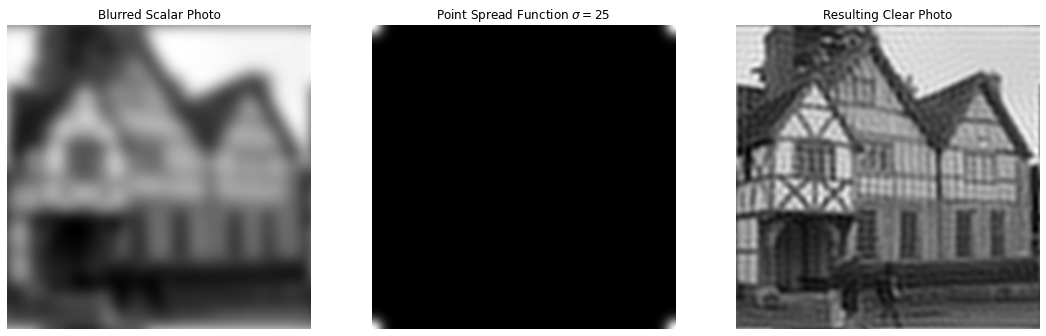

In [52]:
from numpy.fft import rfft2    # the 2 stands for 2 dimenstional, numpy also has rfftN. The fft stands for fast fourier
from numpy.fft import irfft2   # transform while the r stands for real. The i stands for inverse, and the and the and the


blur_c = rfft2(blur)           # c means it's in the Fourier domain
blur_c_dup = blur_c            # i create this duplicate function for the clear_c line
psf_c =  rfft2(psf_array)       


"""
Now we divide them, but we look at the Hint. We can avoid dividing by zero using the line below
which I lifted from the python gods:
https://stackoverflow.com/questions/26248654/how-to-return-0-with-divide-by-zero
"""
clear_c = np.divide(blur_c, psf_c, out=blur_c_dup, where = psf_c > 10**-3)


clear = irfft2(clear_c)        # we take the inverse transform to get back the clear photo

# Time to plot

fig, ax = plt.subplots(1, 3)

ax[0].imshow(blur, cmap='gray')
ax[1].imshow(psf_array, cmap='gray')
ax[2].imshow(clear, cmap='gray')


fig.set_size_inches(18.5, 10.5, forward=True)

ax[0].set_title('Blurred Scalar Photo')
ax[1].set_title('Point Spread Function $\sigma = 25$')
ax[2].set_title('Resulting Clear Photo')


ax[0].set_xticklabels([])
ax[0].set_yticklabels([])   # removes tick labels and ticks, respectively para image talaga
ax[0].axis('off')

ax[1].set_xticklabels([])
ax[1].set_yticklabels([])   # removes tick labels and ticks, respectively para image talaga
ax[1].axis('off')

ax[2].set_xticklabels([])
ax[2].set_yticklabels([])   # removes tick labels and ticks, respectively para image talaga
ax[2].axis('off')

This is truly one of the methods of all time!

##### Comments - Leo

- **Score: 50/50**